<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

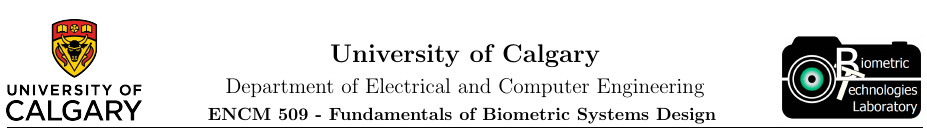

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline

## Statistics

In [32]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 10

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([49.18166145, 39.44428693, 53.59514771, 45.94599063, 60.23879917,
       50.45680473, 41.54099735, 54.98533162, 46.94106252, 52.24488085])

REAL mean: 49.46; std: 5.95


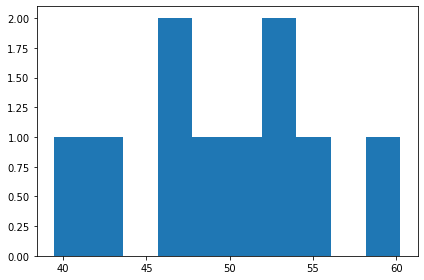

In [33]:
plt.hist(pop_norm);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

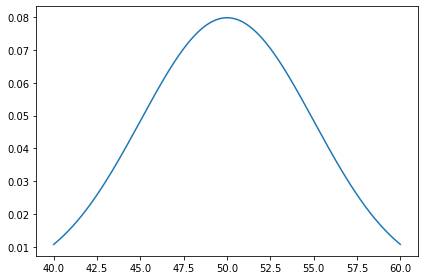

In [34]:
x = np.arange(40, 60, 0.01)

x_pdf = norm.pdf(x, loc=mu, scale=std)
plt.plot(x, x_pdf);

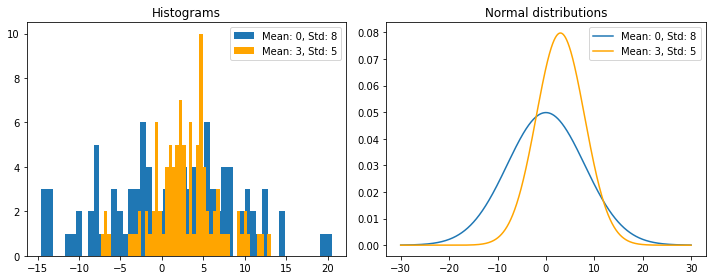

In [35]:
mu1, std1 = 0, 8 # blue
mu2, std2 = 3, 5 # orange

# population with higher variance
pop_norm1 = norm.rvs(mu1, std1, size=100)
pop_norm2 = norm.rvs(mu2, std2, size=100)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pop_norm1, bins=50);
plt.hist(pop_norm2, bins=50, color='orange')
plt.title('Histograms')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])

plt.subplot(1,2,2)
x1 = np.arange(-30, 30, 0.01)
plt.plot(x1, norm.pdf(x1, loc=mu1, scale=std1))
plt.plot(x1, norm.pdf(x1, loc=mu2, scale=std2), color='orange')
plt.legend(['Mean: 0, Std: 8', 'Mean: 3, Std: 5'])
plt.title('Normal distributions');

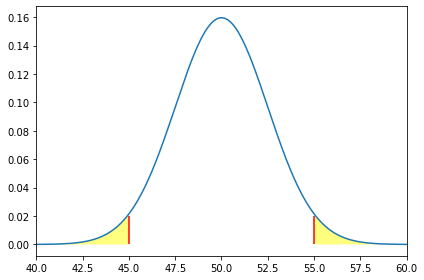

In [36]:
x = np.arange(0, 100, 0.01)

mu = 50
std = 2.5

x_pdf = norm.pdf(x, loc=mu, scale=std)

fig, ax = plt.subplots()
ax.plot(x, x_pdf)
# highlighting the critical regions
ax.fill_between(x, x_pdf, where=x<45, facecolor='yellow', alpha=0.5)
ax.fill_between(x, x_pdf, where=x>55, facecolor='yellow', alpha=0.5)

# lines corresponding to defined critical regions
ax.vlines([45, 55], 0, 0.02, 'r')
plt.xlim([40, 60]);

## Loading data
The data folder should be in the same directory as this Notebook

In [37]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'signature_samples/biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '1.csv')

coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

csv_file.head()

FileNotFoundError: [Errno 2] No such file or directory: 'signature_samples/biometrics/impostor/1.csv'

## Plotting based on Pressure

In [8]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

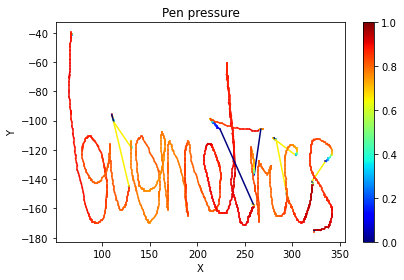

In [9]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

## Plotting presure over time

In [10]:
# removing outliers (after normalization): < 250 and > 150
prs = []
for x in prs1:
    if (x > 150 and x < 250):
        prs.append(x)

In [11]:
np.max(prs), np.min(prs), np.mean(prs)

(249, 152, 216.90580545943868)

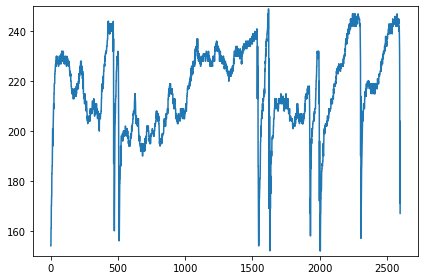

In [12]:
plt.plot(prs)
plt.ylim([150, 250]);

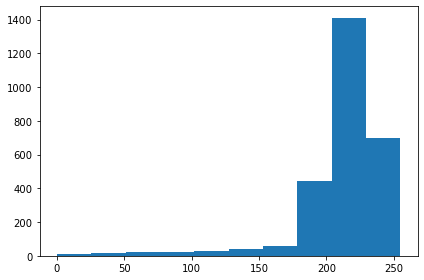

In [13]:
plt.hist(prs1);

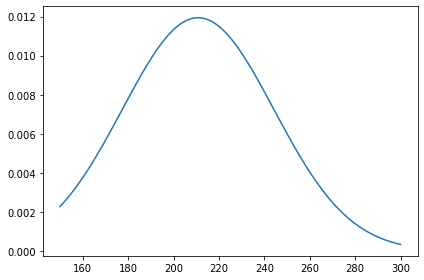

In [14]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)

x = np.arange(150, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf)

## Plotting and calculating the Velocity

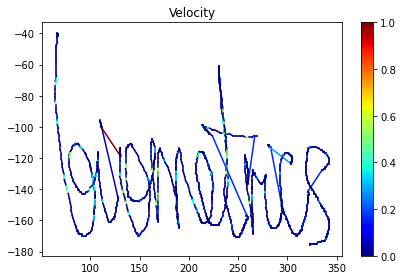

In [15]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = time1[i+1] - time1[i]
    if time_diff == 0:
        time_diff = 0.0001

    vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

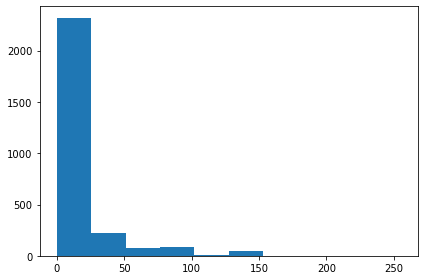

In [16]:
plt.hist(vel);

## Plotting Pressure in 3D

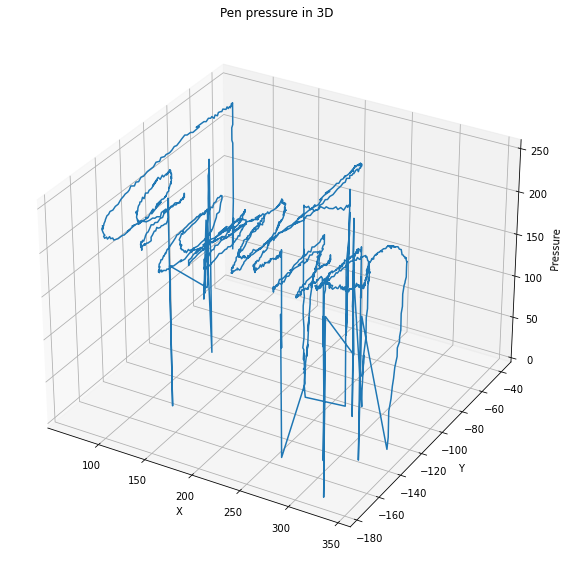

In [17]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# necessary to reshape to vector using .flatten method
ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

## Statistical Evaluation

In [18]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

In [19]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(data_dir + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.63; velocity: 11.20
#1 - pressure: 0.50; velocity: 9.83
#2 - pressure: 0.50; velocity: 12.17
#3 - pressure: 0.53; velocity: 15.97
#4 - pressure: 0.47; velocity: 16.27
#5 - pressure: 0.52; velocity: 18.06
#6 - pressure: 0.49; velocity: 11.96
#7 - pressure: 0.53; velocity: 13.95
#8 - pressure: 0.52; velocity: 10.02
#9 - pressure: 0.50; velocity: 12.55
#10 - pressure: 0.49; velocity: 19.25
#11 - pressure: 0.54; velocity: 14.77
#12 - pressure: 0.54; velocity: 16.59
#13 - pressure: 0.52; velocity: 10.51
#14 - pressure: 0.55; velocity: 17.67
#15 - pressure: 0.56; velocity: 17.65
#16 - pressure: 0.54; velocity: 12.37
#17 - pressure: 0.58; velocity: 9.33
#18 - pressure: 0.61; velocity: 10.27
#19 - pressure: 0.68; velocity: 15.83
#20 - pressure: 0.52; velocity: 11.14
#21 - pressure: 0.58; velocity: 18.02
#22 - pressure: 0.58; velocity: 7.16
#23 - pressure: 0.64; velocity: 11.04
#24 - pressure: 0.59; velocity: 17.19
#25 - pressure: 0.60; velocity: 10.20
#26 - pressure: 0.58; vel

In [20]:
# get only the 1st velocity 'mean' and 'std'
print(stats_measures[0,0], stats_measures[0,1])

n = norm(stats_measures[0,0], stats_measures[0,1])

11.195794053662073 28.915672643775643


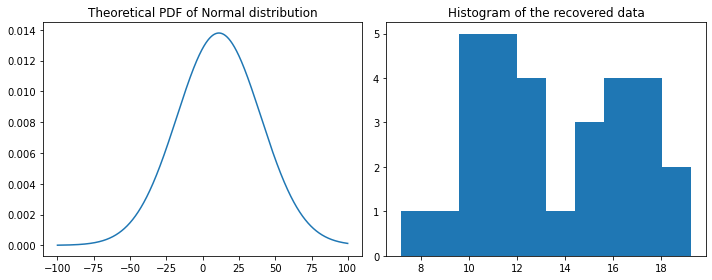

In [21]:
x = np.arange(-100, 100, 0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, n.pdf(x))
plt.title('Theoretical PDF of Normal distribution');

plt.subplot(1,2,2)
plt.hist(stats_measures[:,0]);
plt.title('Histogram of the recovered data');

# put the name of the set in the title

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).


**Specific Questions**

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.

Real mean for 10 samples: 52.24
Real standard deviation for 10 samples: 5.00

Real mean for 1000 samples: 50.11
Real standard deviation for 1000 samples: 5.02


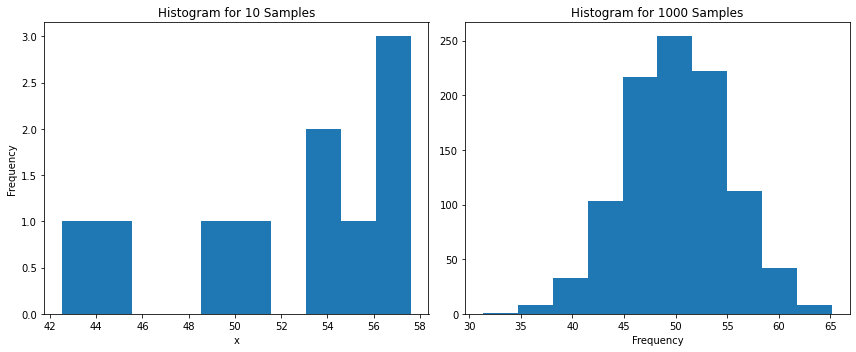

In [78]:
mu = 50 # Theoretical mean
std = 5 # Theoretical standard deviation
qtt_10samples = 10
qtt_1000samples = 1000

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

pop_norm_10 = norm.rvs(mu, std, size=qtt_10samples)
pop_norm_1000 = norm.rvs(mu, std, size=qtt_1000samples)

ax1.hist(pop_norm_10)
ax1.set_title("Histogram for 10 Samples")
ax1.set_xlabel("x")
ax1.set_ylabel("Frequency")

ax2.hist(pop_norm_1000)
ax2.set_title("Histogram for 1000 Samples")
ax2.set_xlabel("Frequency")

mean_10_samples = np.mean(pop_norm_10)
std_dev_10_samples = np.std(pop_norm_10)

mean_1000_samples = np.mean(pop_norm_1000)
std_dev_1000_samples = np.std(pop_norm_1000)

print("Real mean for 10 samples: {:.2f}".format(mean_10_samples))
print("Real standard deviation for 10 samples: {:.2f}\n".format(std_dev_10_samples))
print("Real mean for 1000 samples: {:.2f}".format(mean_1000_samples))
print("Real standard deviation for 1000 samples: {:.2f}".format(std_dev_1000_samples))

Comparingf

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a genuine person, and an "impostor" signature that replicates the shape but not the original pressure. Load the sample signature provided.

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

To calculate velocity, we use the formula distance/change in time. We can't divide by 0, so the purpose of the line `if time_diff == 0` is so that if the pen movement between two points was too fast to be captured by the software, it will still allow us to calculate the velocity by using a really small number (0.0001), rather than 0.

- **Exercise 4** (3 marks): Now we perform statistical analysis of pressure and velocity distribution across 30  signatures of the same person. We will represent the pressure  of each signature by its 'mean value', and then consider the distribution of these means across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate mean values and standard deviation for   pressure, and separately for velocity. Create a  normal distribution of the values across the signatures of the same individual. 

In [9]:
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

Mean for velocity: 21.79195536188001
Standard deviation for velocity 8.887452580304547

Mean for pressure: 0.3926727624021132
Standard deviation for pressure: 0.06352114670807053


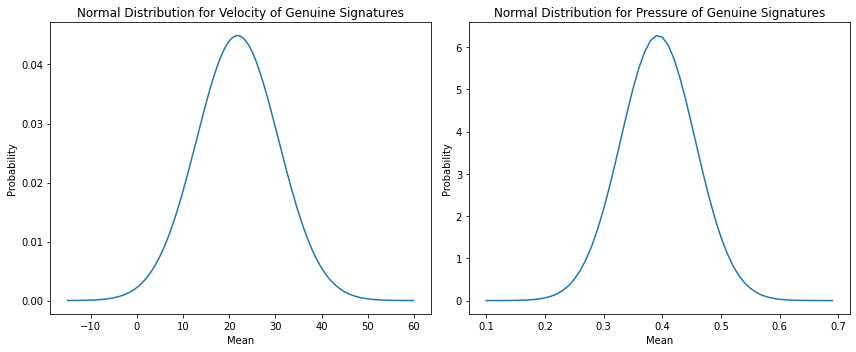

In [76]:
# Columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

data_dir = "./signatures/genuine/"

for i in range(30):
    csv_file = pd.read_csv(data_dir + "{}.csv".format(i+1))

    coord = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coord)

    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)

    stats_measures[i, 2] = np.mean(prs)
    stats_measures[i, 3] = np.std(prs)

mean_vel = stats_measures[:,0].mean()
std_vel = stats_measures[:,1].std()
mean_pressure = stats_measures[:,2].mean()
std_pressure = stats_measures[:,3].mean()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

x1 = np.arange(-15, 60, 0.1)
x2 = np.arange(0.1, 0.7, 0.01)

pdf_vel = norm.pdf(x1, mean_vel, std_vel)
pdf_pressure = norm.pdf(x2, mean_pressure, std_pressure)

ax1.plot(x1, pdf_vel)
ax1.set_title("Normal Distribution for Velocity of Genuine Signatures")
ax1.set_xlabel("Mean")
ax1.set_ylabel("Probability")

ax2.plot(x2, pdf_pressure)
ax2.set_title("Normal Distribution for Pressure of Genuine Signatures")
ax2.set_xlabel("Mean")
ax2.set_ylabel("Probability")

print("Mean for velocity: {}".format(mean_vel))
print("Standard deviation for velocity {}\n".format(std_vel))
print("Mean for pressure: {}".format(mean_pressure))
print("Standard deviation for pressure: {}".format(std_pressure))

- **Exercise 5** (3 marks): Now  perform statistical analysis of pressure and velocity distribution across 30 impostor signatures. As an "Impostor", you can use either the 30 "forged" signatures (or part b of the pre-recorded set), or 30 writing by yourself by of different shape/word (or part c of the pre-recorded set). Represent the pressure (or velocity) of each signature by its mean, and then consider the distribution of these \emph{means} across impostor signatures. Draw a conclusion about the distributions for "genuine" signatures from Exercise 4 and the "impostor" ones from Exercise 5.

Mean for velocity: 15.63493598331671
Standard deviation for velocity 5.926798511111932

Mean for pressure: 0.3394080076902812
Standard deviation for pressure: 0.07590087399824161


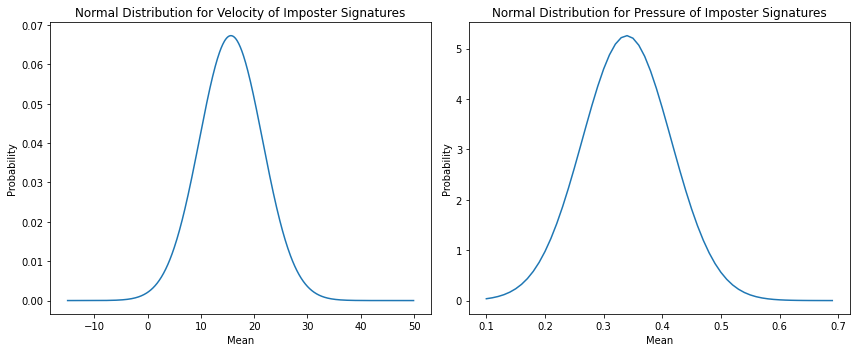

In [77]:
# Columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))

data_dir = "./signatures/imposter/"

for i in range(30):
    csv_file = pd.read_csv(data_dir + "{}.csv".format(i+1))

    coord = csv_file[['X', 'Y']].to_numpy()
    time = csv_file['Time'].to_numpy().reshape((-1,1))
    prs = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time, coord)

    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)

    stats_measures[i, 2] = np.mean(prs)
    stats_measures[i, 3] = np.std(prs)

mean_vel = stats_measures[:,0].mean()
std_vel = stats_measures[:,1].std()
mean_pressure = stats_measures[:,2].mean()
std_pressure = stats_measures[:,3].mean()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

x1 = np.arange(-15, 50, 0.1)
x2 = np.arange(0.1, 0.7, 0.01)

pdf_vel = norm.pdf(x1, mean_vel, std_vel)
pdf_pressure = norm.pdf(x2, mean_pressure, std_pressure)

ax1.plot(x1, pdf_vel)
ax1.set_title("Normal Distribution for Velocity of Imposter Signatures")
ax1.set_xlabel("Mean")
ax1.set_ylabel("Probability")

ax2.plot(x2, pdf_pressure)
ax2.set_title("Normal Distribution for Pressure of Imposter Signatures")
ax2.set_xlabel("Mean")
ax2.set_ylabel("Probability")

print("Mean for velocity: {}".format(mean_vel))
print("Standard deviation for velocity {}\n".format(std_vel))
print("Mean for pressure: {}".format(mean_pressure))
print("Standard deviation for pressure: {}".format(std_pressure))

- **BONUS**  (3 marks): Propose a solution to the following: some signatures have pen-off fragment. Such fragment are plotted by connecting the start and end points by a straight line which is not a correct representation of the signature. Hint: replace pen-up locations (using some threshold for the pressure values, found by trial) with NaN (not-a-number) or use other approach (such as analyzing if time breaks are less than certain value, for instance, 20ms).